Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 297 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): ...1, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,restecg,Observation Count
<dbl>,<dbl>,<dbl>,<dbl>,<int>
54.54209,131.6936,247.3502,0.996633,297


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


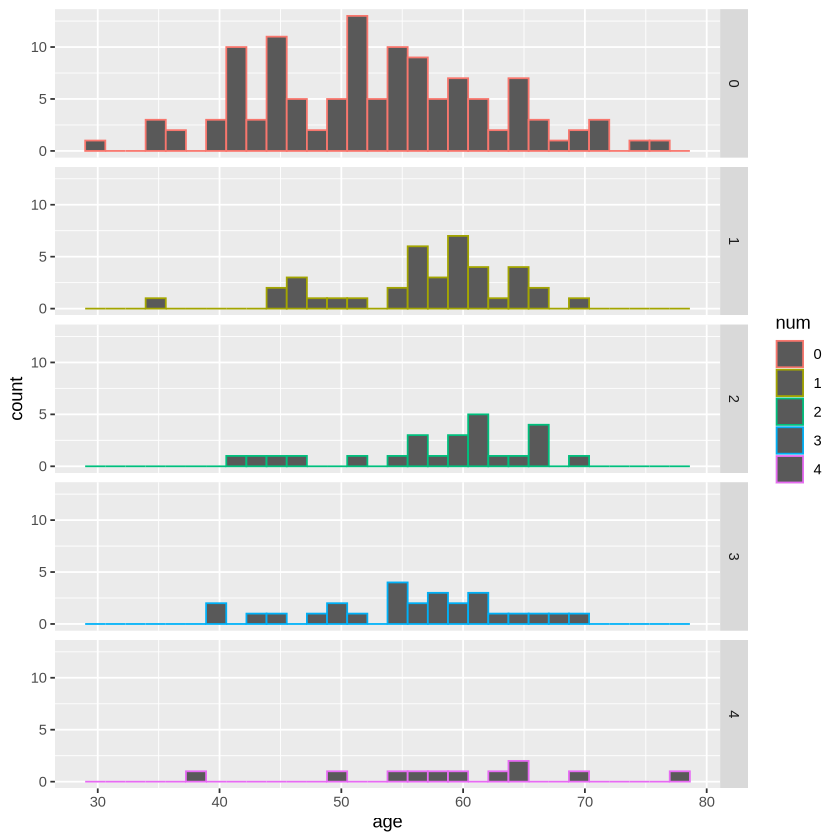

In [33]:
library(dplyr) #Loading all libraries 
library(tidyr)
library(purrr)
library(forcats)
library(readr)
library(readxl)
library(ggplot2)
library(cowplot)
library(repr)
library(RPostgres)
library(RSQLite)
library(workflows)
library(recipes)
library(parsnip)
library(DBI)
library(tidyverse)
library(tidymodels)
library(gridExtra)

#Accessing the file from the webw
download.file("https://raw.githubusercontent.com/000557A/WebDataSet/main/processed.cleveland.data", "Data/processed.cleveland.data")

#Reading the data, and excluding lines with "?"
heart_data <- read_delim("Data/processed.cleveland.data", delim = ",",
          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak" , "slope", "ca", "thal", "num")
                        )|> filter(ca != '?' , thal != "?") |>
mutate("sex" = as.factor(sex),
       "cp" = as.factor(cp),
       "fbs" = as.factor(fbs),
       "restecg" = as.factor(restecg),
       "exang" = as.factor(exang),
      "num" = as.factor(num))

#Write the processed data frame in a csv
write.csv(heart_data, "Data/data.csv")

# Read the csv, excluding the first "number" row
bob <- read_csv("Data/data.csv")|>
        select(age:num)

#Calculating the average value from our dataset
heart_data_mean <-bob |>
map_df(mean)|>
mutate("Observation Count" = nrow(bob)) |>
select(age,trestbps,chol,restecg,"Observation Count")

#The actual table
heart_data_mean

#splits
heart_split <- initial_split(heart_data, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

age_plot <- ggplot(heart_train, aes(x= age, color = num)) +
geom_histogram(position = "identity")+
facet_grid(rows = vars(num))

age_plot
chol_plot <- ggplot(heart_train, aes(x= chol, color = num)) +
geom_histogram(position = "identity", bins=35)+
facet_grid(rows = vars(num))

